In [1]:
import jax
import jax.numpy as jnp
import numpy as np

from IPython.display import HTML
import matplotlib.animation as anim
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import hj_reachability as hj

## Example system: `Air3d`

In [2]:
dynamics = hj.systems.Air3d()
grid = hj.Grid.from_lattice_parameters_and_boundary_conditions(hj.sets.Box(np.array([-6., -10., 0.]),
                                                                           np.array([20., 10., 2 * np.pi])),
                                                               (51, 40, 50),
                                                               periodic_dims=2)
values = jnp.linalg.norm(grid.states[..., :2], axis=-1) - 5



## `hj.step`: propagate the HJ PDE from `(time, values)` until `continue_condition` is no longer satisfied

### Run the problem until the target time is reached

In [18]:
time = 0.
target_time = -50.

continue_condition = (  # Default continue condition
    lambda init_time_values: lambda time_values: jnp.abs(init_time_values[0] - time_values[0]) > 0
)


solver_settings = hj.SolverSettings.with_accuracy("very_high",
                                                  hamiltonian_postprocessor=hj.solver.backwards_reachable_tube,
                                                  continue_condition=continue_condition)

hj.time_integration.setup_sampling(grid, int(jnp.prod(jnp.array(grid.shape))/ 2))

target_values = hj.step(solver_settings, dynamics, grid, time, values, target_time)

100%|##########| 50.0000/50.0 [04:29<00:00,  5.40s/sim_s]


<Figure size 432x288 with 0 Axes>

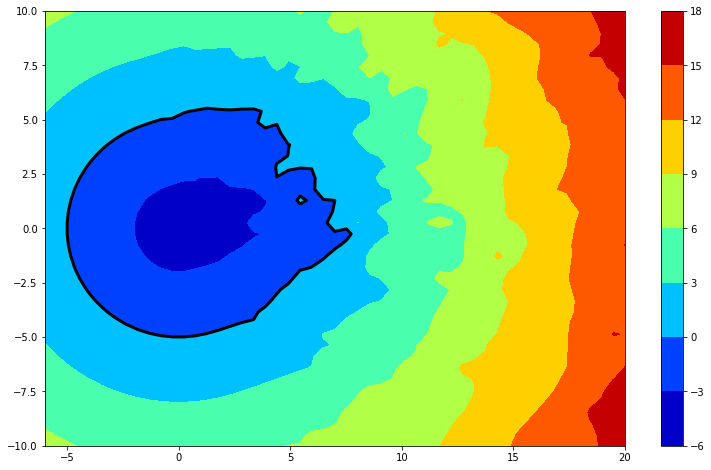

In [19]:
plt.jet()
plt.figure(figsize=(13, 8))
plt.contourf(grid.coordinate_vectors[0], grid.coordinate_vectors[1], target_values[:, :, 30].T)
plt.colorbar()
plt.contour(grid.coordinate_vectors[0],
            grid.coordinate_vectors[1],
            target_values[:, :, 30].T,
            levels=0,
            colors="black",
            linewidths=3)